In [355]:
import pandas as pd
import numpy as np           #for Mathematical calculations
import matplotlib.pyplot as plt    #for ploting graphs.
from datetime import datetime       # To access datetime
from pandas import Series           # To access series
%matplotlib inline
import warnings                    #To ignore warnings
warnings.filterwarnings("ignore")

In [356]:
#Reading the data
train=pd.read_csv("/home/ayushi/Downloads/Train_SU63ISt.csv")
test=pd.read_csv("/home/ayushi/Downloads/Test_0qrQsBZ.csv")
submission=pd.read_csv("/home/ayushi/Downloads/Sample_Submission_QChS6c3.csv")

In [357]:
#Making a copy, to protect original data
train_original = train.copy()
test_original =test.copy()

In [358]:
#Let's Explore the data
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

ID is the unique number given to each observation point.


Datetime is the time of each observation.


Count is the passenger count corresponding to each Datetime.

In [359]:
#Let's look at datatypes of train and test
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [360]:
#Size of Train and test
train.shape, test.shape

((18288, 3), (5112, 2))

# Hypothesis Generation:
we have made below hypothesis based on our understanding:

1.Traffic will increase as the years pass by

2.Traffic will be high from May to October

3.Traffic on weekdays will be more

4.Traffic during the peak hours will be high

## Feature Extraction:
We will extract the time and date from the Datetime.
We have seen earlier that the data type of Datetime is object. 
So first of all we have to change the data type to datetime format otherwise we can not extract features from it.



In [361]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

In [362]:
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [363]:
#we hve to extract Year,Month,Day and Hour 
for i in (train,test,train_original,test_original):
    i['Year']=i.Datetime.dt.year
    i['Month']=i.Datetime.dt.month
    i['Day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend.

In [364]:
train['Day_of_week']=train.Datetime.dt.dayofweek

Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

In [365]:
train['Is_weekend']=train['Day_of_week'].apply(lambda x :1 if x==5 or x==6 else 0)

Let’s look at the time series.

In [366]:
train.index=train['Datetime']# indexing the Datetime to get the time period on the x-axis. 

In [367]:
df=train.drop('ID',1)# drop ID variable to get only the Datetime on x-axis. 

In [368]:
df.head()

,Datetime,Count,Year,Month,Day,Hour,Day_of_week,Is_weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [369]:
ts=df['Count']

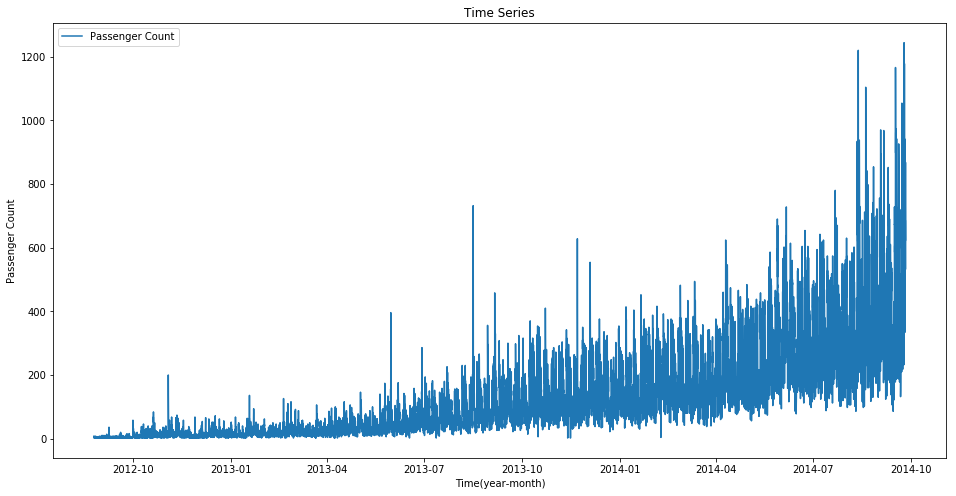

In [370]:
plt.figure(figsize=(16,8))
plt.plot(ts,label="Passenger Count")
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc="best")

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

We will work on the train file for all the analysis and will use the test file for forecasting.

# Exploratory Data Analysis

Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

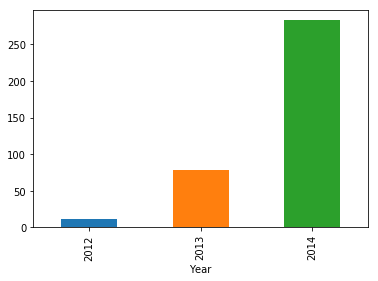

In [371]:
train.groupby('Year')['Count'].mean().plot.bar()

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

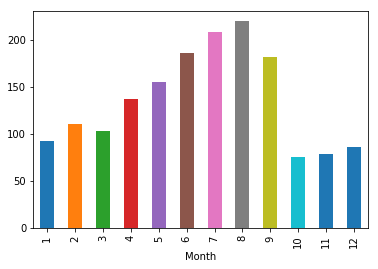

In [372]:
train.groupby('Month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

In [373]:
temp=train.groupby(['Year','Month'])['Count'].mean()

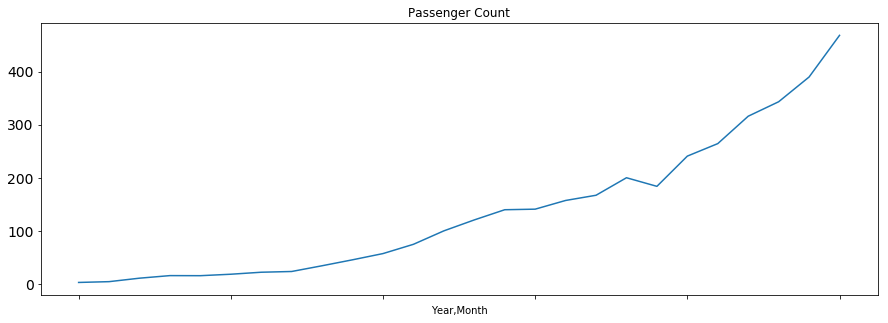

In [374]:
temp.plot(figsize=(15,5), title ='Passenger Count',fontsize=14)

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let’s look at the daily mean of passenger count

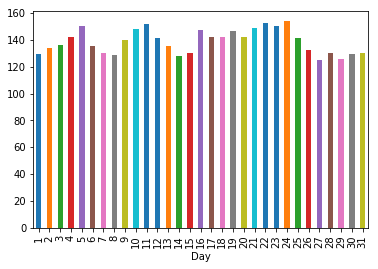

In [375]:
train.groupby('Day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

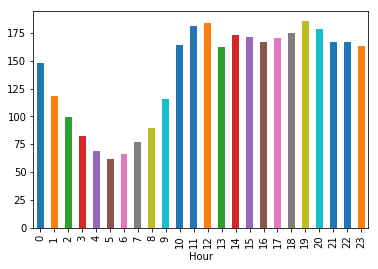

In [376]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

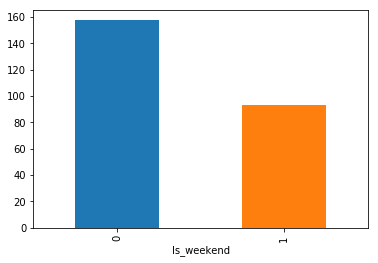

In [377]:
train.groupby('Is_weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Now we will try to look at the day wise passenger count.

Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

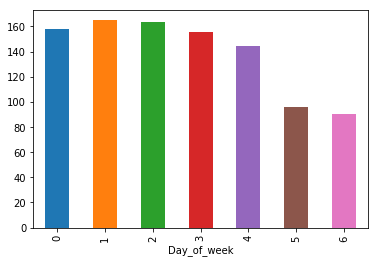

In [378]:
train.groupby('Day_of_week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [379]:
train=train.drop('ID',1)

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.



In [380]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [381]:
train.index=train.Timestamp

In [382]:
train.head()

,Datetime,Count,Year,Month,Day,Hour,Day_of_week,Is_weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [383]:
hourly =train.resample('H').mean()#Hourly Time Series

In [384]:
daily = train.resample('D').mean()#Daily Time Series

In [385]:
weekly =train.resample('W').mean()#Weekly Time Series

In [386]:
monthly =train.resample('M').mean()

Let’s look at the hourly, daily, weekly and monthly time series.

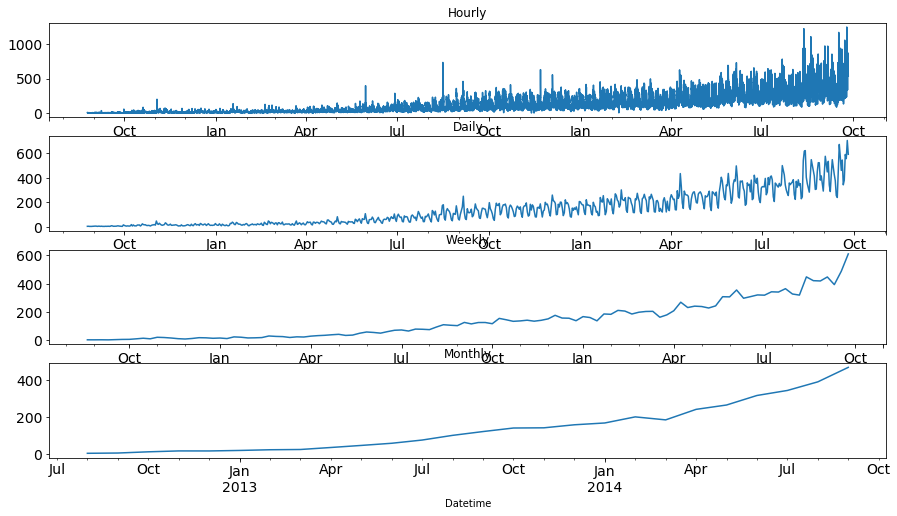

In [387]:
fig,axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax=axs[3])

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [388]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp
test=test.resample('D').mean()
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
train=train.resample('D').mean()

As we have validated all our hypothesis, let’s go ahead and build models for Time Series Forecasting. But before we do that, we will need a dataset(validation) to check the performance and generalisation ability of our model. Below are some of the properties of the dataset required for the purpose.

The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

So, for the above two reasons, we generally divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset. Now there are multiple ways to divide the train dataset such as Random Division etc. You can look for all of the different validation methods here: https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/.

# 1) Splitting the data into training and validation part
Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [389]:
Train = train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.

Now we will look at how the train and validation part has been divided.

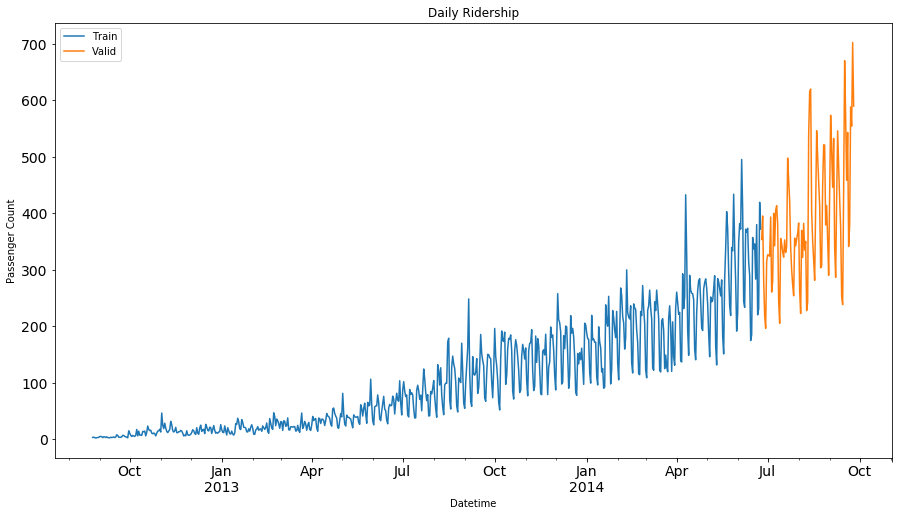

In [390]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize='14',label='Train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize='14',label='Valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach

ii) Moving Average

iii) Simple Exponential Smoothing

iv) Holt’s Linear Trend Model

We will discuss each of these methods in detail now.



# 1.Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. Lets understand it with an example and an image:
Suppose we have passenger count for 5 days as shown below:

Day	Passenger Count
1	10
2	12
3	14
4	13
5	15
And we have to predict the passenger count for next 2 days. Naive approach will assign the 5th day’s passenger count to the 6th and 7th day, i.e., 15 will be assigned to the 6th and 7th day.

Day	Passenger Count
1	10
2	12
3	14
4	13
5	15
6	15
7	15

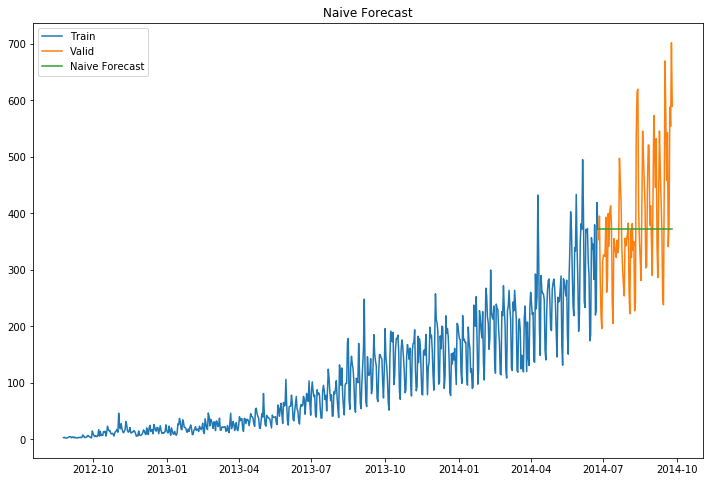

In [391]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['Naive']=dd[len(dd)-1] #here prediction is the last element of data
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['Naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are.



In [392]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.Naive)) 
print(rms)

111.79050467496724


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

# 2.Moving Average

In this technique we will take the average of the passenger counts for last few time periods only.
Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.

Lets try the rolling mean for last 10, 20, 50 days and visualize the results.



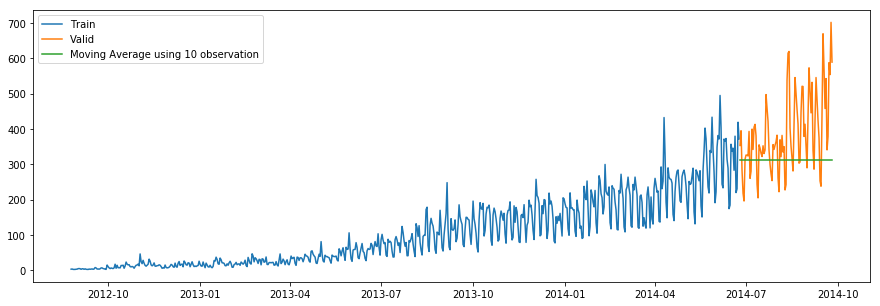

In [393]:
y_hat_avg=valid.copy()
y_hat_avg['moving_Average_forecast']=Train['Count'].rolling(10).mean().iloc[-1]# average of last 10 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_Average_forecast'],label='Moving Average using 10 observation')
plt.legend(loc='best')
plt.show()

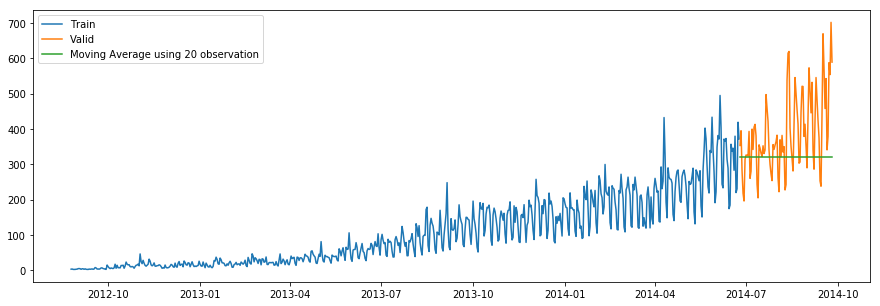

In [394]:
y_hat_avg=valid.copy()
y_hat_avg['moving_Average_forecast']=Train['Count'].rolling(20).mean().iloc[-1]# average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_Average_forecast'],label='Moving Average using 20 observation')
plt.legend(loc='best')
plt.show()

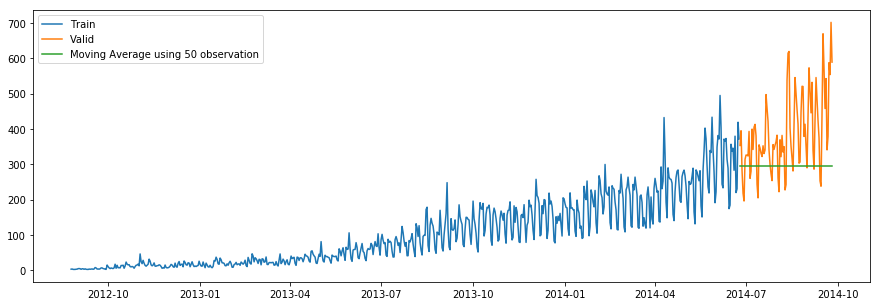

In [395]:
y_hat_avg=valid.copy()
y_hat_avg['moving_Average_forecast']=Train['Count'].rolling(50).mean().iloc[-1]# average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_Average_forecast'],label='Moving Average using 50 observation')
plt.legend(loc='best')
plt.show()

In [396]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_Average_forecast)) 
print(rms)

144.19175679986802


# 3.Simple Exponential Smoothing
In this technique, we assign larger weights to more recent observations than to observations from the distant past.

The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.



In [397]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt,SimpleExpSmoothing
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES']=fit2.forecast(len(valid))

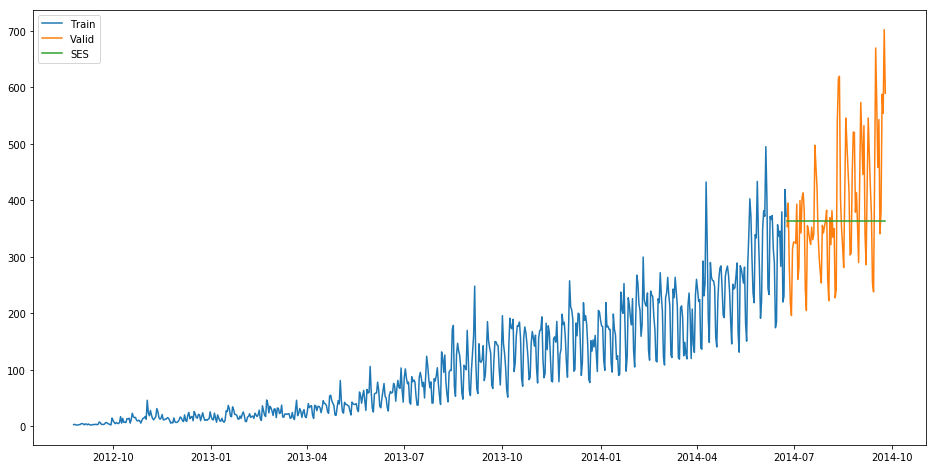

In [398]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [399]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rms)

113.43708111884514


We can infer that the fit of the model has improved as the rmse value has reduced.

# 4.Holt’s Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.

This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.

Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.

Seasonal, which tells us about the seasonality in the time series.

Residual, which is obtained by removing any trend or seasonality in the time series.


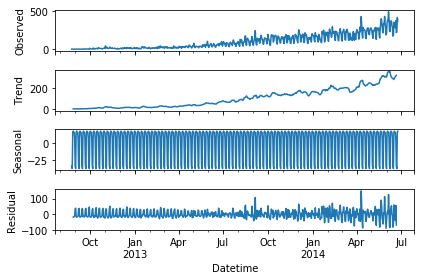

In [400]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

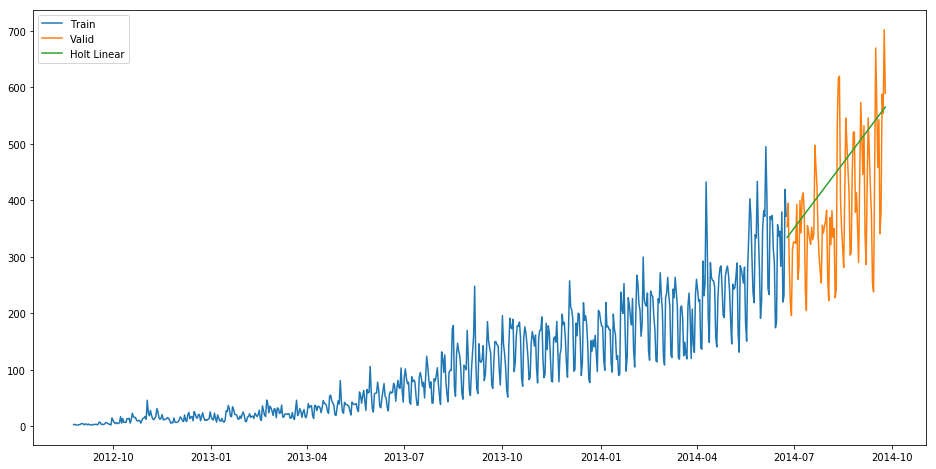

In [401]:
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.1)
y_hat_avg['Holt_linear']=fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_linear'],label='Holt Linear')
plt.legend(loc='best')
plt.show()

In [402]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg['Holt_linear']))
rms

112.94278345314041

It can be inferred that the rmse value has decreased.

Let’s make prediction for the test dataset.

In [403]:
predict=fit1.forecast(len(test))

In [404]:
test['Prediction']=predict

Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [405]:
#Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [406]:
#Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum() 

In [407]:
#Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

In [408]:
temp2=pd.read_csv("GROUPby.csv")

In [409]:
temp2=temp2.drop('Hour.1',1) 

In [410]:
test.head()

,ID,Year,Month,Day,Hour,Prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [411]:
#Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('Day','Month', 'Year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1) 
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

In [412]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['Prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [413]:
#Let’s drop all other features from the submission file and keep ID and Count only.

submission=prediction.drop(['ID_x', 'Day', 'ID_y','Prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

# 5.Holt winter’s model on daily time series
Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

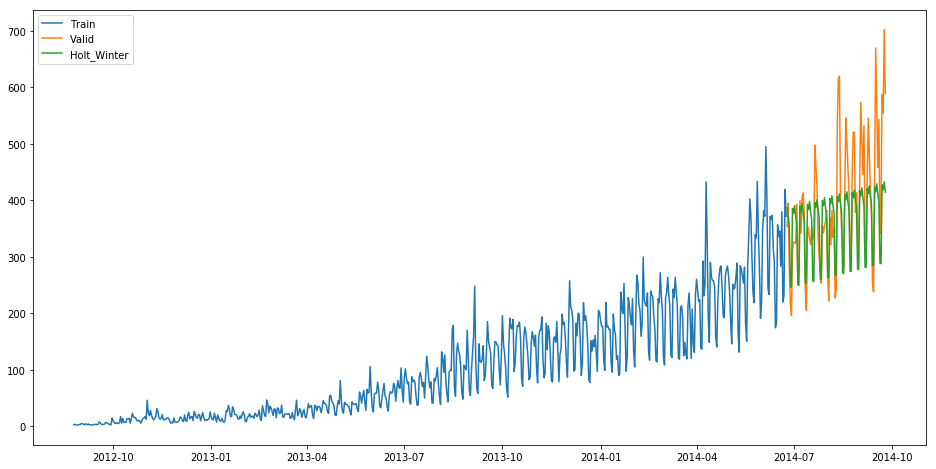

In [414]:
y_hat_avg=valid.copy()
fit1 =ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [415]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.38013370389145


In [416]:
predict=fit1.forecast(len(test))
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('Day','Month', 'Year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y'] 
#Holt winters model produced rmse of 328.356 on the leaderboard.
#The possible reason behind this may be that this model was not that good 
#in predicting the trend of the time series but worked really well on the seasonality part.


# 5) Introduction to ARIMA model
ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

Here p is the order of the autoregressive model(number of time lags)

d is the degree of differencing(number of times the data have had past values subtracted)

q is the order of moving average model. We will discuss more about these parameters in next section.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :

The mean of the time series should not be a function of time. It should be constant.

The variance of the time series should not be a function of time.

THe covariance of the ith term and the (i+m)th term should not be a function of time.

Why do we have to make the time series stationary?

We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

# 6) Parameter tuning for ARIMA model
First of all we have to make sure that the time series is stationary. If the series is not stationary, we will make it stationary.

# Stationarity Check
We use Dickey Fuller test to check the stationarity of the series.

The intuition behind this test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).

The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

In [417]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(24).std() 
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

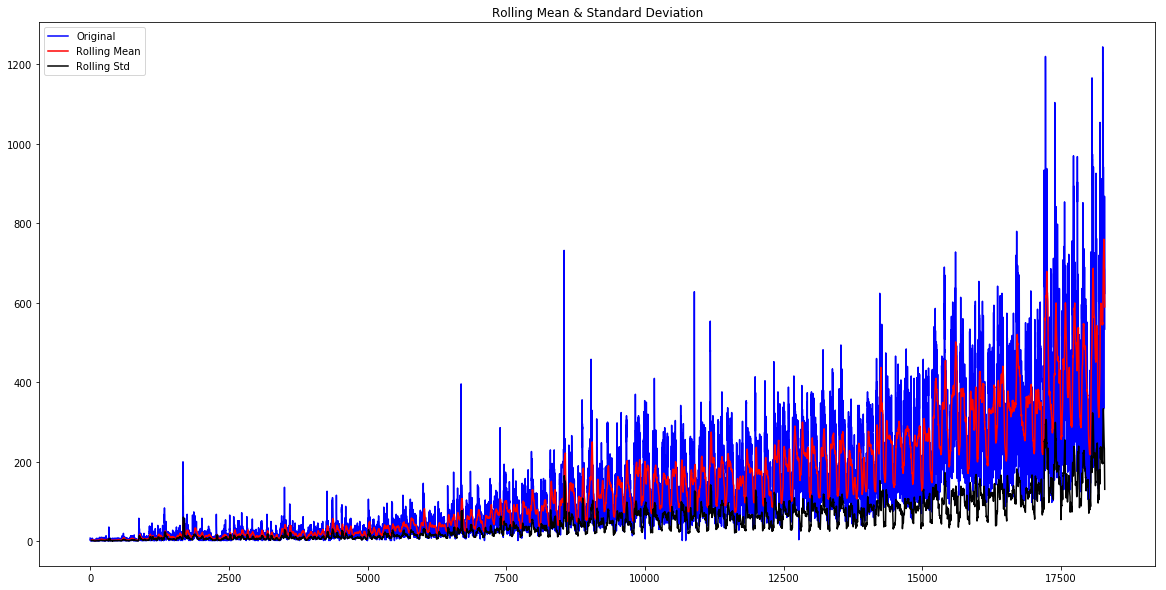

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [418]:
 from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

## Removing Trend
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

In [419]:
Train_log=np.log(Train['Count'])
Valid_log=np.log(valid['Count'])

In [420]:
moving_avg=Train_log.rolling(24).mean()

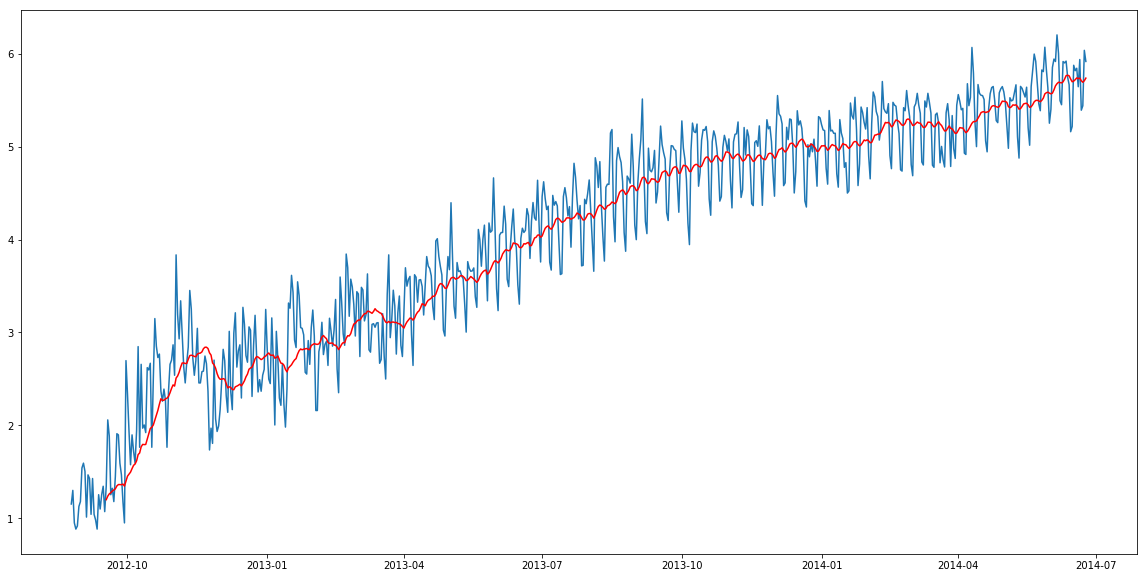

In [421]:
plt.plot(Train_log)
plt.plot(moving_avg,color='red')
plt.show()

So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

In [422]:
train_log_moving_avg_diff=Train_log - moving_avg

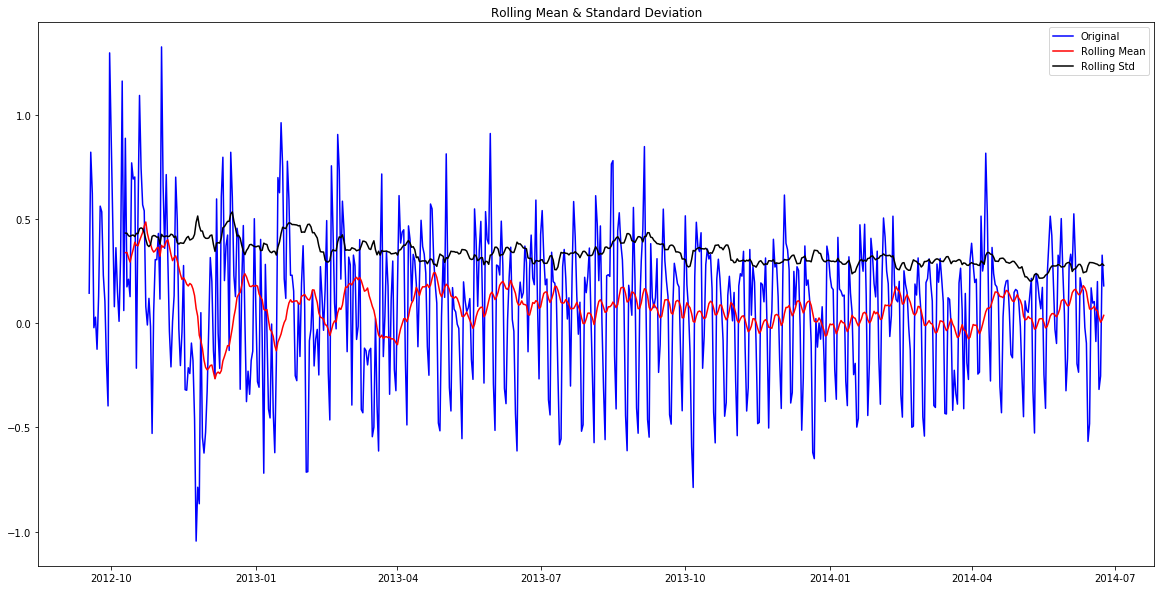

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [423]:
#Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

Differencing can help to make the series stable and eliminate the trend.

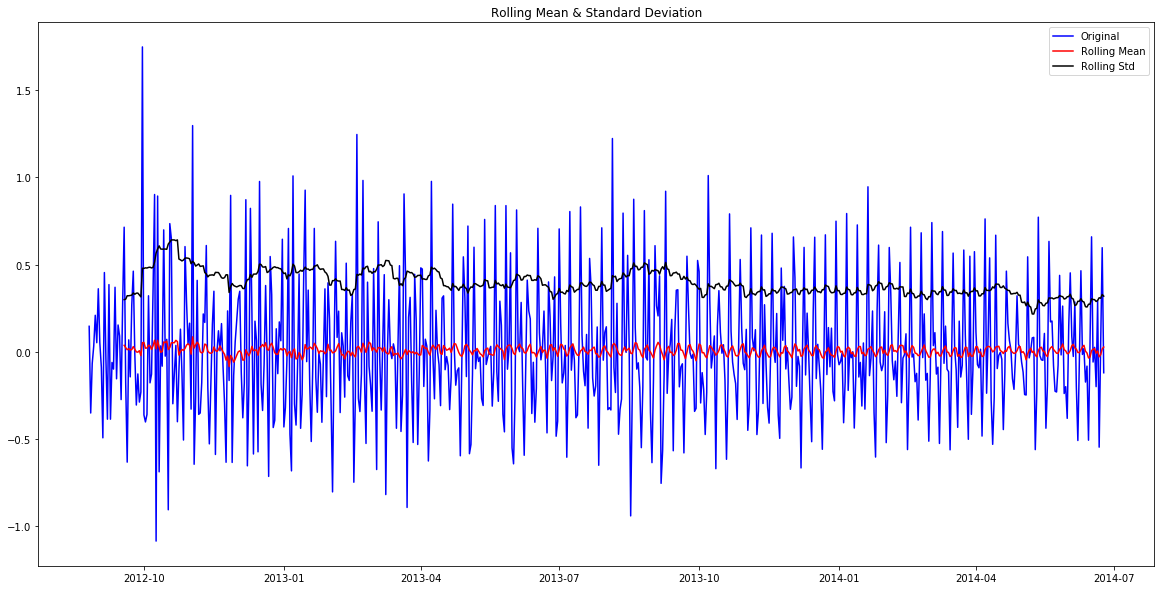

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [424]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

# Removing Seasonality
By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
Seasonality is always of a fixed and known period.
We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

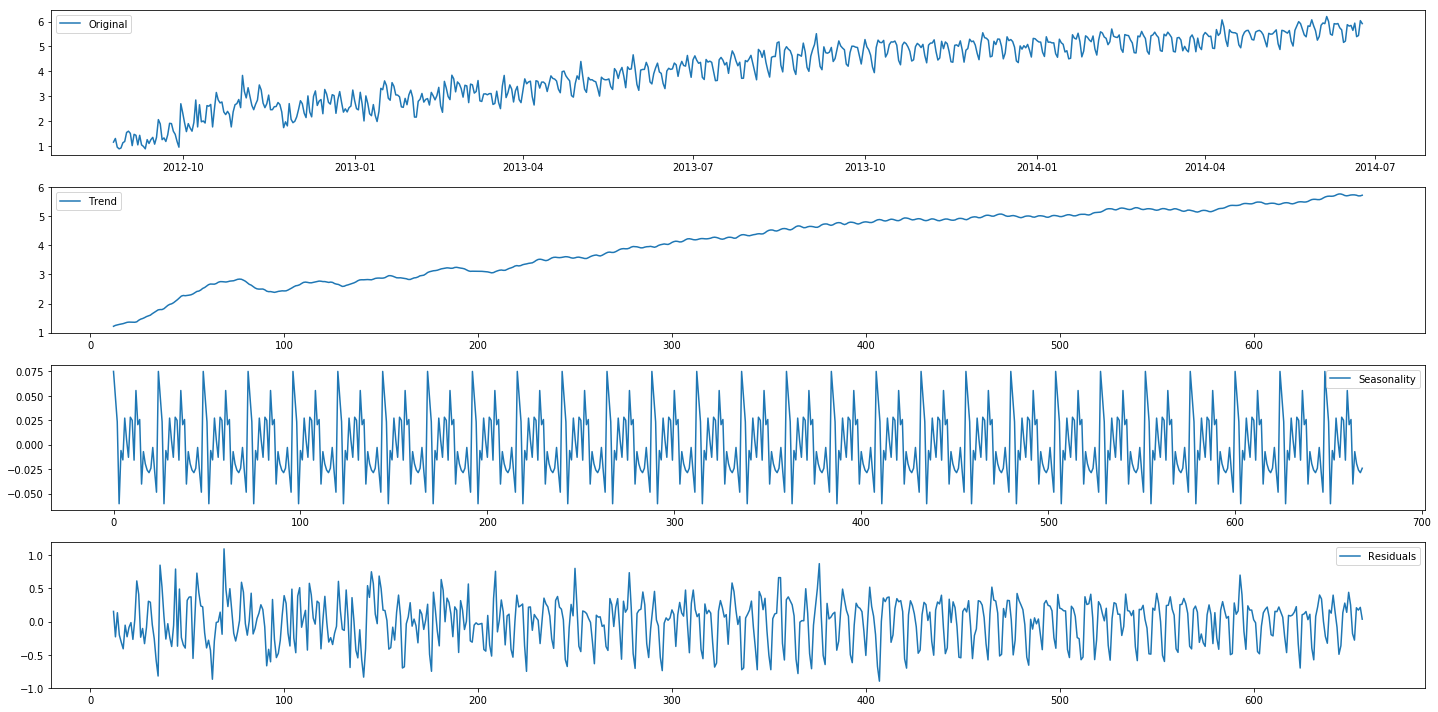

In [425]:
decomposition = sm.tsa.seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

Let’s check stationarity of residuals.

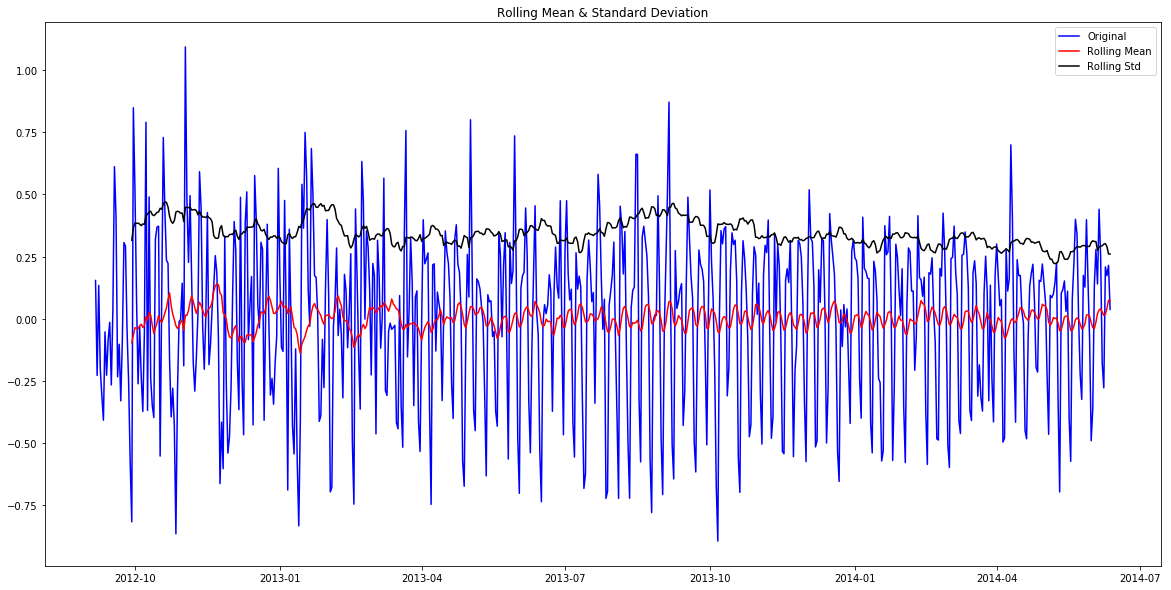

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [426]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

It can be interpreted from the results that the residuals are stationary.

Now we will forecast the time series using different models.

# Forecasting the time series using ARIMA
First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.



# ACF(AutoCorrelation Function)
Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

# Partial Autocorrelation Function
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

PACF (partial autocorrelation function) is essentially the autocorrelation of a signal with itself at different points in time, with linear dependency with that signal at shorter lags removed, as a function of lag between points of time. Informally, the partial correlation between xt and xt+h is the autocorrelation between xt and xt+h without the contribution of xt+1,xt+2,....,xt+h−1.

n general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2. This partial correlation can be computed as the square root of the reduction in variance that is achieved by adding X3 to the regression of Y on X1 and X2.

A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. The autocorrelation of a time series Y at lag 1 is the coefficient of correlation between Yt and Yt-1, which is presumably also the correlation between Yt-1 and Yt-2. But if Yt is correlated with Yt-1, and Yt-1 is equally correlated with Yt-2, then we should also expect to find correlation between Yt and Yt-2. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.



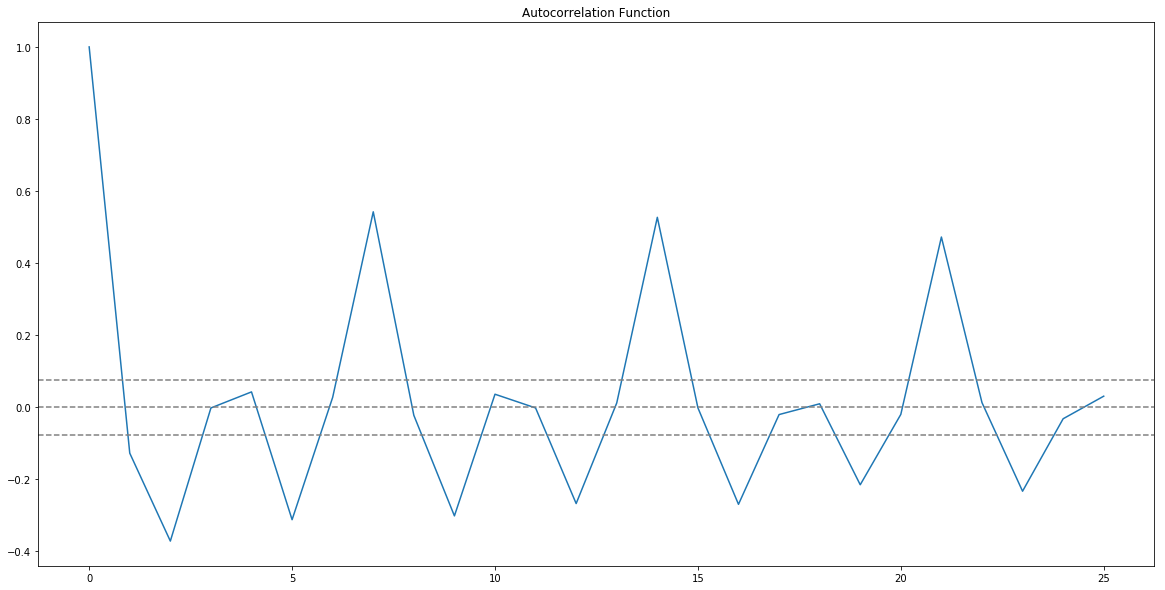

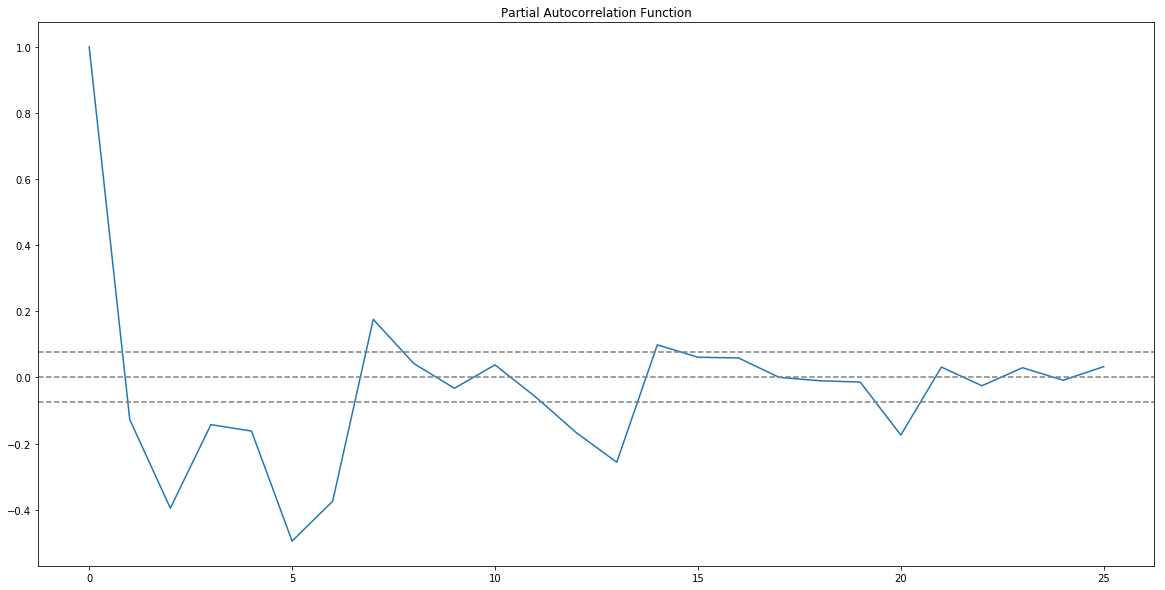

In [427]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

# AR model
The autoregressive model specifies that the output variable depends linearly on its own previous values.

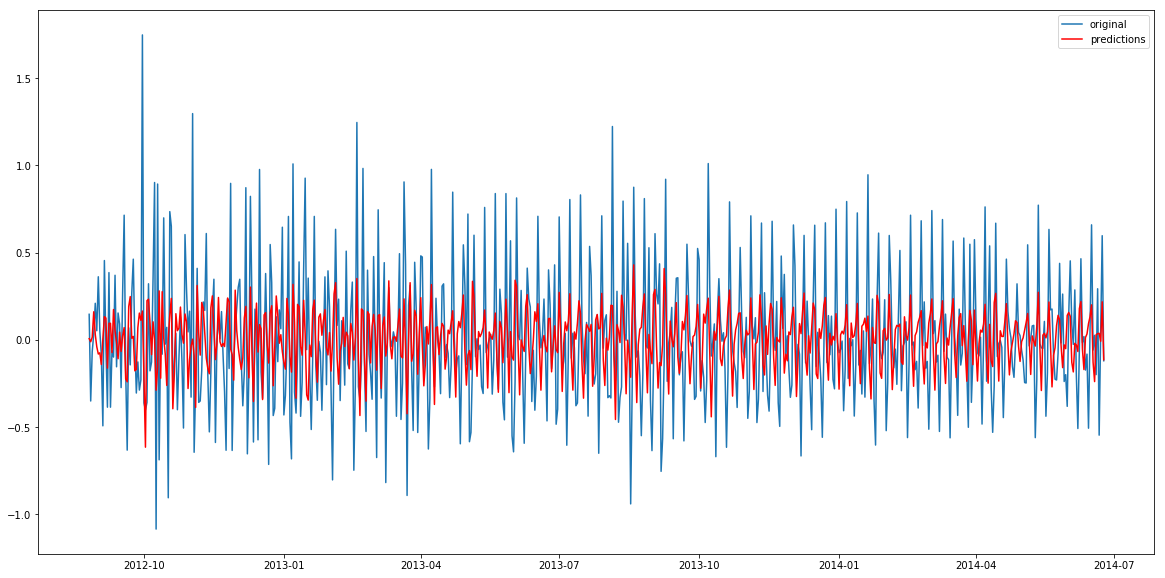

In [428]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

Lets plot the validation curve for AR model.

We have to change the scale of the model to the original scale.

First step would be to store the predicted results as a separate series and observe it.

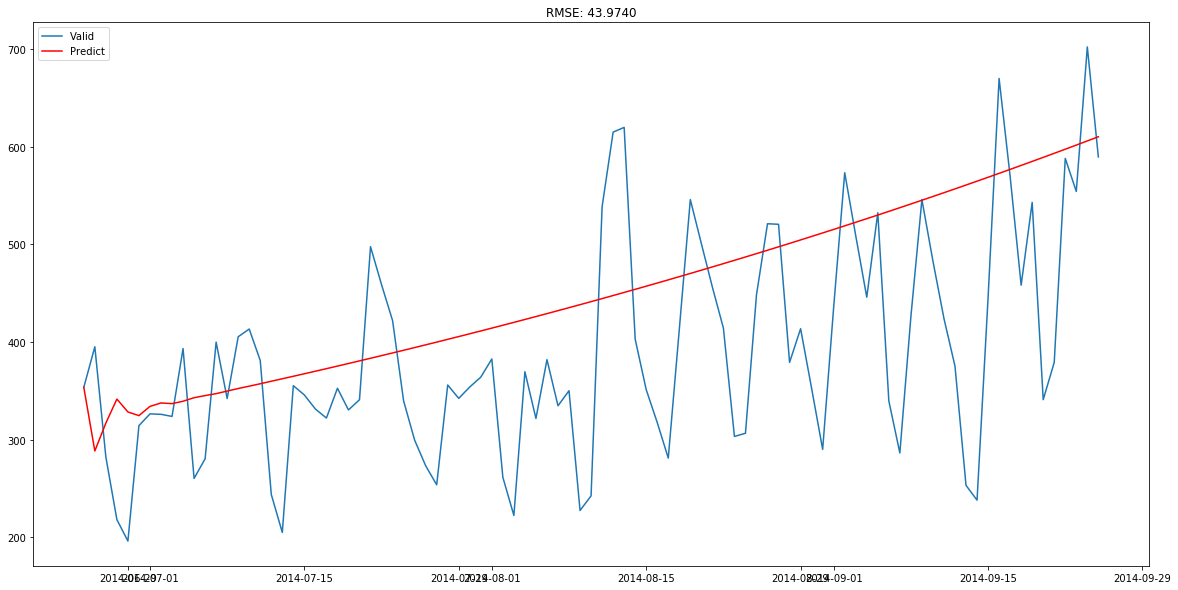

In [429]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()
#Here the red line shows the prediction for the validation set. Let’s build the MA model now.

# MA model
The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

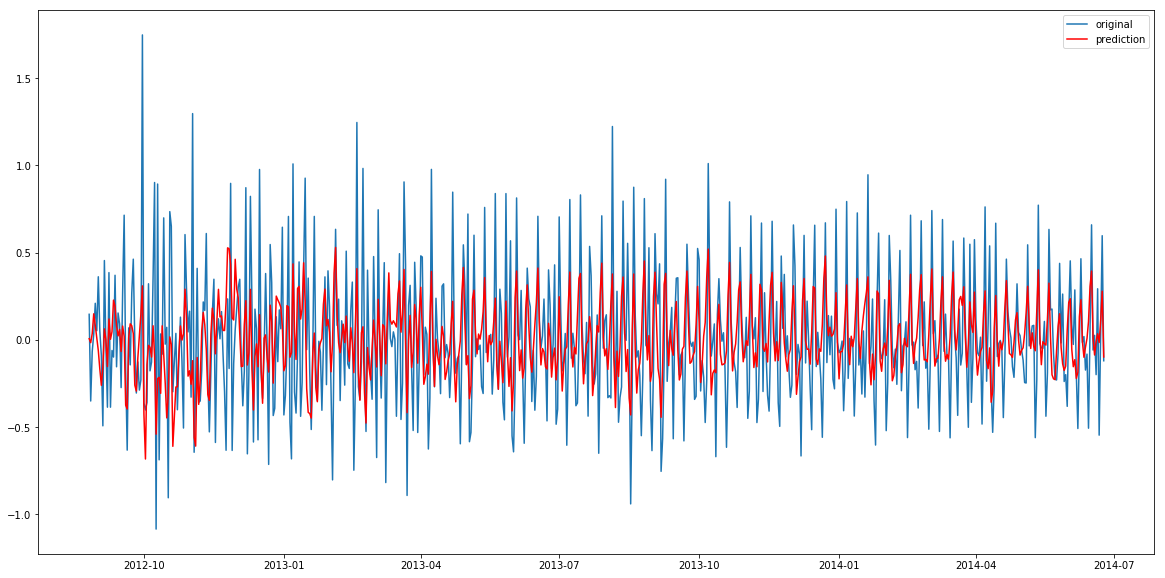

In [430]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

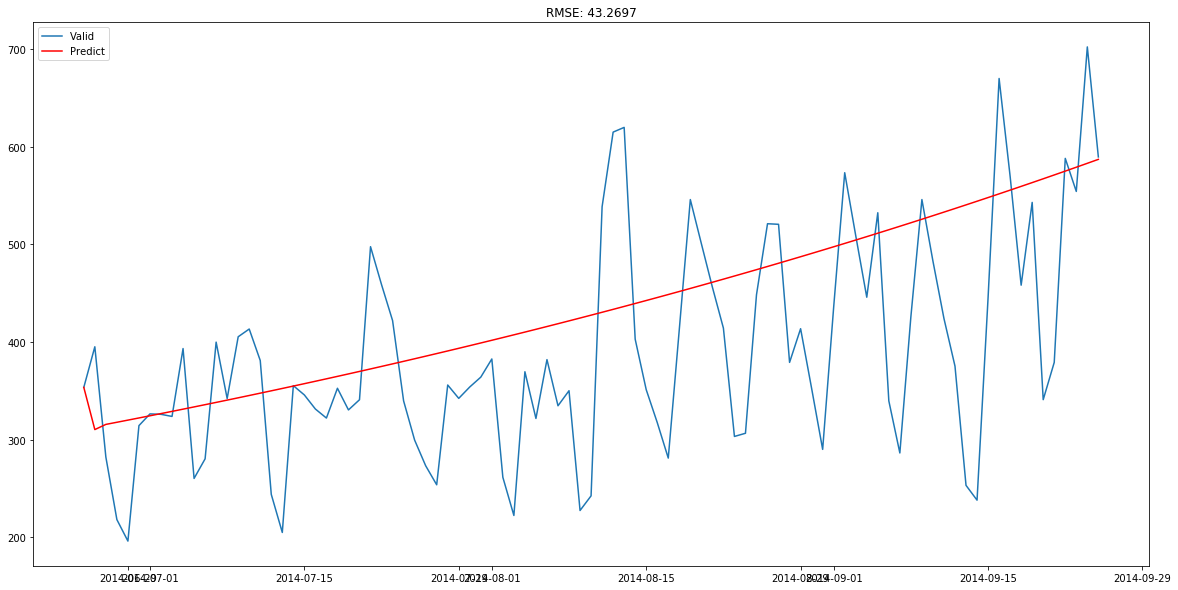

In [431]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0])) 
plt.show()

# Combined model

p- periods taken for autoregressive model

d-Integrated order or differnce,

q- periods in moving average

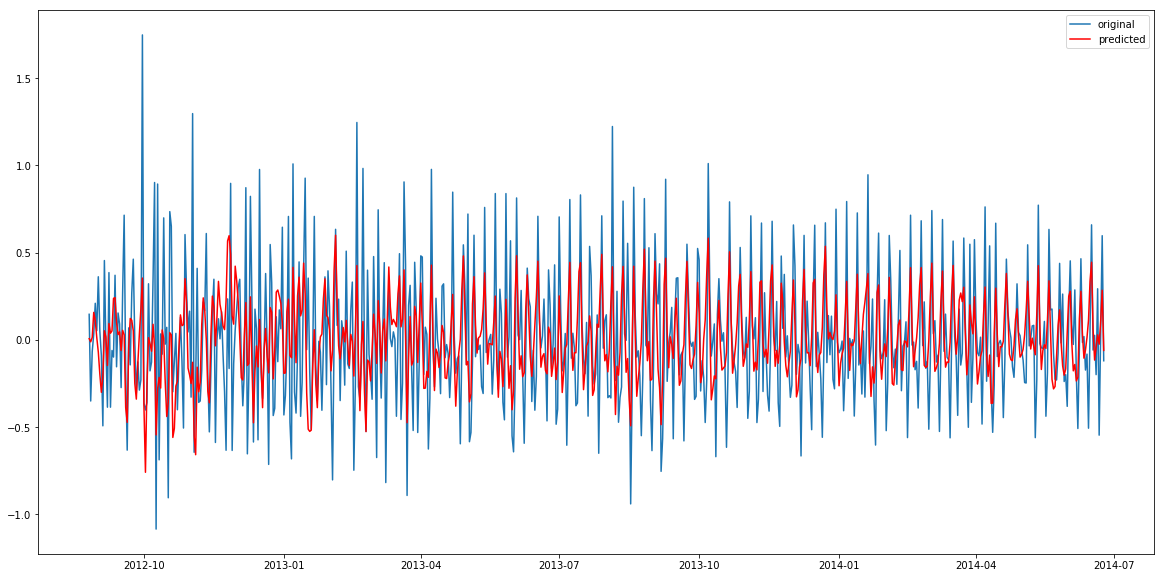

In [432]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

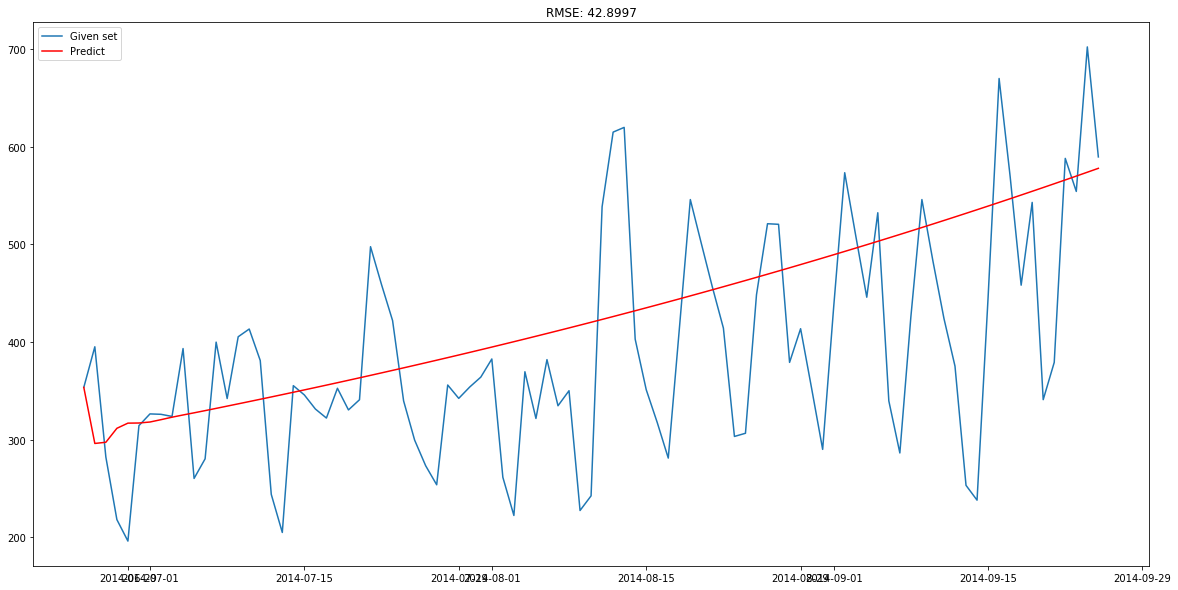

In [433]:
#Let’s define a function which can be used to change the scale of the model to the original scale.

def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()
#Let’s predict the values for validation set.

ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)


# SARIMAX model on daily time series
SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

In [434]:
y_hat_avg = valid.copy()

In [439]:
fit1 = sm.tsa.statespace.SARIMAX(Train.Count,order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()

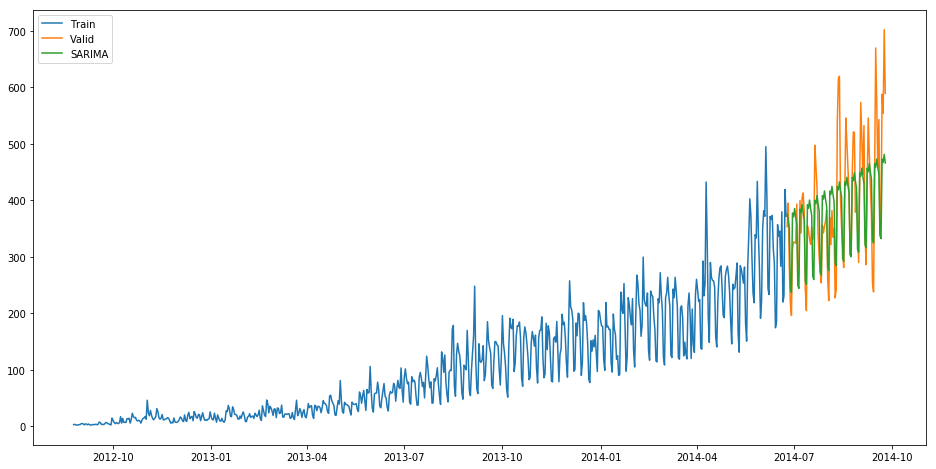

In [441]:
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [442]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

69.78441939745768


In [443]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [445]:
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('Day','Month', 'Year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24


What else can be tried to improve your model further?
You can try to make a weekly time series and make predictions for that series and then distribute those predictions into daily and then hourly predictions.

Use combination of models(ensemble) to reduce the rmse. To read more about ensemble techniques you can refer these articles:

https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/

https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/

To read further about the time series analysis you can refer these articles:

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/